# SAT & ACT Participation Analysis: State Research
***

### Contents:
- [State Requirements](#State-Requirements)
- [State 1: Colorado](#State-1:-Colorado)
- [State 2: West Virginia](#State-2:-West-Virginia)
- [State 3: Tennessee](#State-3:-Tennessee)

*Import Libraries*

In [1]:
import pandas as pd
import seaborn as sns       

#### Read In SAT & ACT  Data

Read in the `final.csv` and assign to a dataframe.

In [2]:
# Read in the final data
final = pd.read_csv('../data/final.csv')

In [3]:
# Look at the first 5 rows of the data
final.head()

,state,2017_sat_participation,2017_sat_ebrw,2017_sat_math,2017_sat_total,2017_act_participation,2017_act_english,2017_act_math,2017_act_reading,2017_act_science,2017_act_composite,2018_sat_participation,2018_sat_ebrw,2018_sat_math,2018_sat_total,2018_act_participation,2018_act_composite
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2,0.06,595,571,1166,1.00,19.1
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8,0.43,562,544,1106,0.33,20.8
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7,0.29,577,572,1149,0.66,19.2
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4,0.05,592,576,1169,1.00,19.4
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8,0.60,540,536,1076,0.27,22.7


In [4]:
# Check datatypes of each column
final.dtypes

state                      object
2017_sat_participation    float64
2017_sat_ebrw               int64
2017_sat_math               int64
2017_sat_total              int64
2017_act_participation    float64
2017_act_english          float64
2017_act_math             float64
2017_act_reading          float64
2017_act_science          float64
2017_act_composite        float64
2018_sat_participation    float64
2018_sat_ebrw               int64
2018_sat_math               int64
2018_sat_total              int64
2018_act_participation    float64
2018_act_composite        float64
dtype: object

## State Requirements

In [5]:
# Import dataset that identifies states that require SAT or ACT
# https://www.ecs.org/wp-content/uploads/State-Information-Request_Use-of-ACT-SAT-and-PSAT-for-High-School-Testing-as-Required-by-ESSA.pdf
state_info = pd.read_csv('../data/state_info.csv')

In [6]:
state_info.head()

,State,ACT Required,SAT Required
0,Alabama,YES,NO
1,Alaska,NO,NO
2,Arizona,NO,NO
3,Arkansas,YES,NO
4,California,NO,NO


In [7]:
# rename columns
new_columns_dict = {'State'        : 'state', 
                    'ACT Required' : 'act_required', 
                    'SAT Required' : 'sat_required'}
state_info.rename(columns=new_columns_dict, inplace=True)

In [8]:
state_info.columns

Index(['state', 'act_required', 'sat_required'], dtype='object')

In [9]:
# Creating table with additional state info and saving it to 'final_plus_state_info.csv'
everything = pd.merge(final, state_info, on = 'state')
everything.to_csv('../data/final_plus_state_info.csv')

In [10]:
# Verifying the table is looking as expected with new columns
everything.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 19 columns):
state                     51 non-null object
2017_sat_participation    51 non-null float64
2017_sat_ebrw             51 non-null int64
2017_sat_math             51 non-null int64
2017_sat_total            51 non-null int64
2017_act_participation    51 non-null float64
2017_act_english          51 non-null float64
2017_act_math             51 non-null float64
2017_act_reading          51 non-null float64
2017_act_science          51 non-null float64
2017_act_composite        51 non-null float64
2018_sat_participation    51 non-null float64
2018_sat_ebrw             51 non-null int64
2018_sat_math             51 non-null int64
2018_sat_total            51 non-null int64
2018_act_participation    51 non-null float64
2018_act_composite        51 non-null float64
act_required              51 non-null object
sat_required              51 non-null object
dtypes: float64(10), int64(6), object(

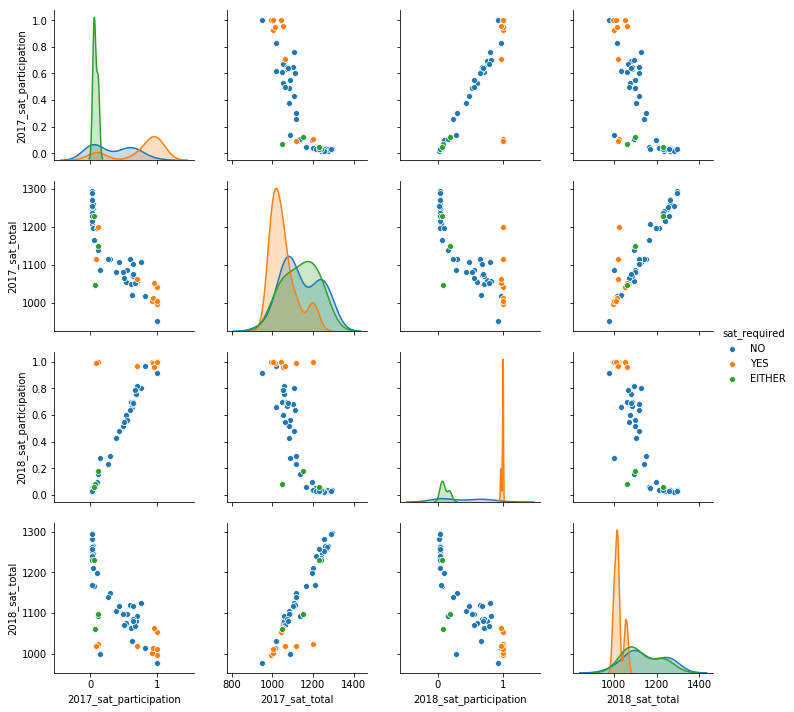

In [11]:
# 2017 and 2018 SAT Participation vs. Composite (Required vs. Not Required)
sns.pairplot(data = everything[['state', '2017_sat_participation', '2017_sat_total',
                                '2018_sat_participation', '2018_sat_total', 'sat_required']],
             hue = 'sat_required');

/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


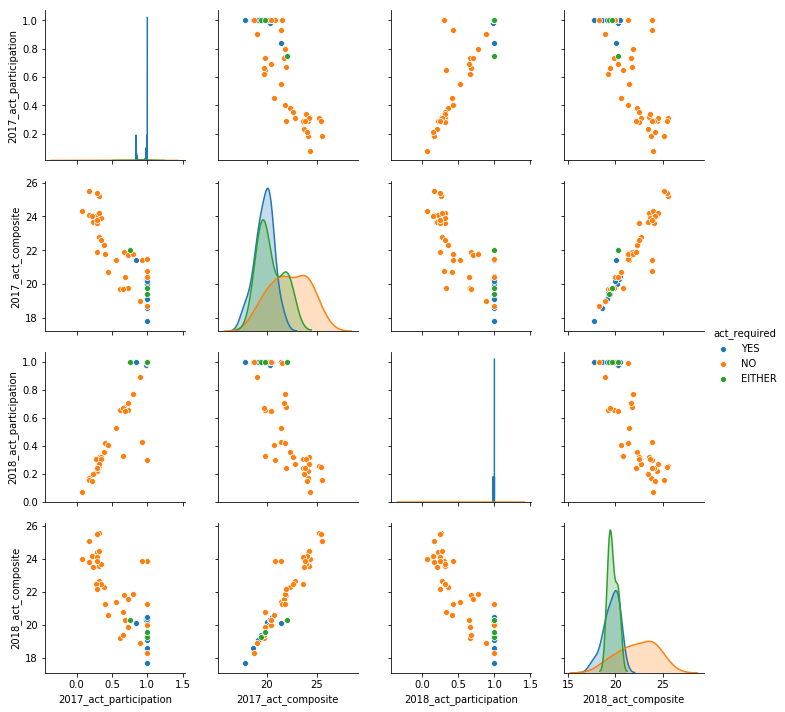

In [12]:
# 2017 and 2018 ACT Participation vs. Composite (Required vs. Not Required)
# Reference (this cell and next): code slightly modifed from Sam Stack's lesson on Advanced Seaborn Plotting
sns.pairplot(data = everything[['state', '2017_act_participation', '2017_act_composite',
                                '2018_act_participation', '2018_act_composite', 'act_required']],
             hue = 'act_required');

Obvservations:
-   In both the SAT and ACT (both years) there seems to be a sligh clustering based on whether or not a given test is required. When the test is required the participationr rates are obviously higher (pulling from a larger sample size) and the tests scares on average are lower...scores showing closer to a normal distribtion

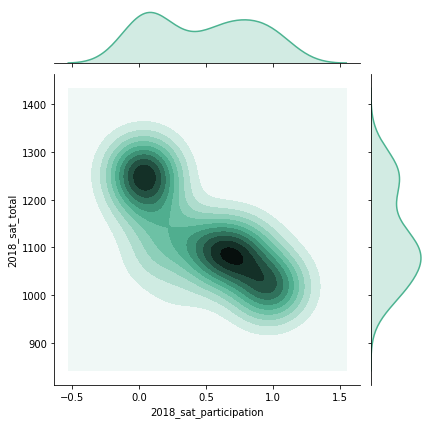

In [13]:
# Reference: code modified from Sam Stack's class notes on Advanced Seaborn Plotting
# Kernel Density shows a topigraphic type map as far as where values are most likely to be/are
sns.jointplot('2018_sat_participation', '2018_sat_total', data = everything, kind="kde", color="#4CB391");

Observations:
-  Here we see a bimodal relationship: high participation and low scores, and low participation and high scores

## State 1: Colorado

RESEARCH:

https://www.chalkbeat.org/posts/co/2015/12/23/goodbye-act-hello-sat-a-significant-change-for-colorado-high-schoolers/
-  "the committee also found 'the College Board’s reporting system more useful to students, as it connects students to resources and activities designed to help identify next steps for extra support or possible acceleration'."
- "Since 2001, every Colorado junior has been required to take the ACT. About 55,000 students took the test last spring in the state’s public schools. The SAT has a much a lower profile in Colorado. About 6,500 students who graduated last spring took the test."
- "Jason Glass, superintendent of the Eagle County school district, said he, too, was taken aback by the decision given the state’s longstanding history with the ACT, and that the SAT is favored by colleges on the East and West coasts"
- "One factor that may have swayed Colorado: the SAT has a reputation for being more reason-based and focused on critical thinking, while the ACT has a reputation for being more of a fact-recall test, Glass noted"
- "State officials say the selection committee that recommended The College Board included educators and administrators from urban, rural and suburban districts, and included content matter experts, assessment experts, special population professionals, guidance counselors and higher education professionals."

https://www.chalkbeat.org/posts/co/2015/12/15/testing-giants-vie-to-provide-colorado-high-school-exams/#.Vnsoy5MrL-Y
- Colorado Junior’s take the test each spring (with one makeup date)
- The test is paid for by the state

In [14]:
# Look at data for Colorado
colorado = final.copy()[final['state'] == 'Colorado'].T
colorado

,5
state,Colorado
2017_sat_participation,0.11
2017_sat_ebrw,606
2017_sat_math,595
2017_sat_total,1201
2017_act_participation,1
2017_act_english,20.1
2017_act_math,20.3
2017_act_reading,21.2
2017_act_science,20.9


## State 2: West Virginia

RESEARCH:

https://www.wsaz.com/content/news/All-WVa-high-school-juniors-to-begin-taking-SAT-exam-beginning-Spring-2018-444248263.html
-  "The West Virginia Department of Education announced the decision Wednesday (9/13/2017) to make the SAT the statewide standardized test for high school juniors."
-  "Each test presented a proposal to the decision-makers at the department and, according to Anderson, the SAT made the most sense for the state."
-  "The assessment will be the same as a typical Saturday SAT assessment, but given to students during the regular school day"
-  "High school students still have the option to take the ACT as their college entrance exam at their own expense."
-  "“I am thrilled that our students will be able take a globally-recognized college admission test at no cost,” said West Virginia Associate Superintendent of Schools, Clayton Burch. “The SAT will add value and influence the effort index among our high school students because it is tied to concrete outcomes and benefits.”"

In [15]:
# State Research: West Virginia
wv = final.copy()[final['state'] == 'West Virginia'].T
wv

,48
state,West Virginia
2017_sat_participation,0.14
2017_sat_ebrw,558
2017_sat_math,528
2017_sat_total,1086
2017_act_participation,0.69
2017_act_english,20
2017_act_math,19.4
2017_act_reading,21.2
2017_act_science,20.5


## State 3: Tennessee

RESEARCH:

https://www.edweek.org/ew/section/multimedia/states-require-students-take-sat-or-act.html
-  "Students must take the ACT or SAT"

https://www.ecs.org/wp-content/uploads/State-Information-Request_Use-of-ACT-SAT-and-PSAT-for-High-School-Testing-as-Required-by-ESSA.pdf
-  "Tennessee: Districts choose to administer the ACT or SAT, or make both available and allow students to decide which assessment to take."

https://www.collegesimply.com/colleges/tennessee/the-university-of-tennessee/admission/
-  Only 17% of applicants to the University of Tennessee submitted SAT score (compared to 99% ACT)

In [16]:
# State Research: Tennessee
tennessee = final.copy()[final['state'] == 'Tennessee'].T
tennessee

,42
state,Tennessee
2017_sat_participation,0.05
2017_sat_ebrw,623
2017_sat_math,604
2017_sat_total,1228
2017_act_participation,1
2017_act_english,19.5
2017_act_math,19.2
2017_act_reading,20.1
2017_act_science,19.9
